In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [238]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [239]:
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [240]:
df['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

In [241]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [243]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

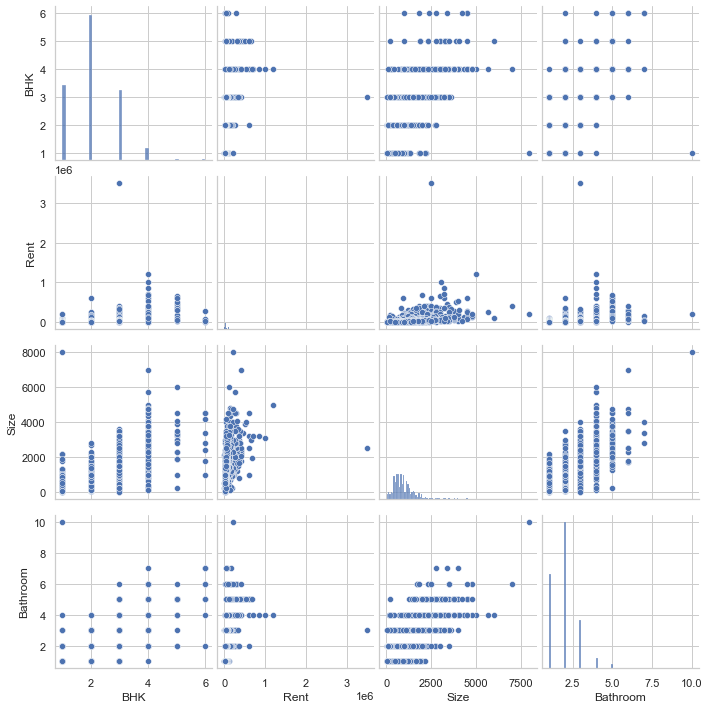

In [244]:
sns.pairplot(df)

<AxesSubplot:xlabel='Rent', ylabel='Count'>

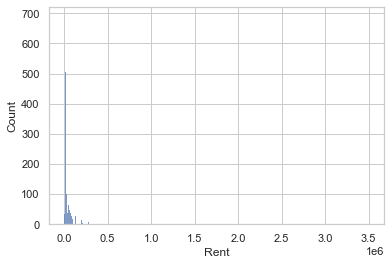

In [245]:
sns.histplot(df['Rent'])

In [246]:
df.shape , df.size

((4746, 12), 56952)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


slope :  50.931642618140955 
intercept :  -14282.440720140461


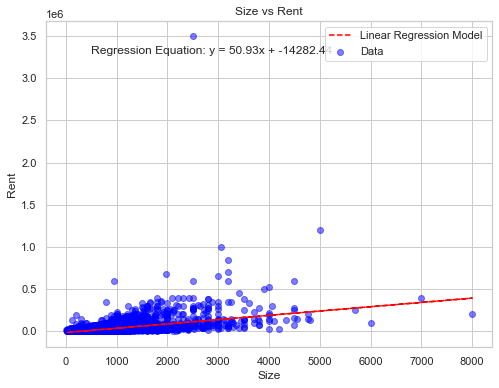

In [248]:
x = df["Size"]
y = df["Rent"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print('slope : ',slope,'\nintercept : ',intercept)

def myLinReg(x):
    return slope * x + intercept

mymodel = list(map(myLinReg, x))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

plt.scatter(x, y, label='Data', color='blue', alpha=0.5)
plt.plot(x, mymodel, color='red', linestyle='--', label='Linear Regression Model')
plt.title('Size vs Rent')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.legend()

eq_text = f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.9, eq_text, transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [249]:
summation = 0
n=len(y)
for i in range (0,n):
  difference = y[i] - mymodel[i]
  squared_difference = difference**2
  summation = summation + squared_difference
MSE = summation/n 
print("The Mean Square Error is: " , MSE)

The Mean Square Error is:  5056193735.008538


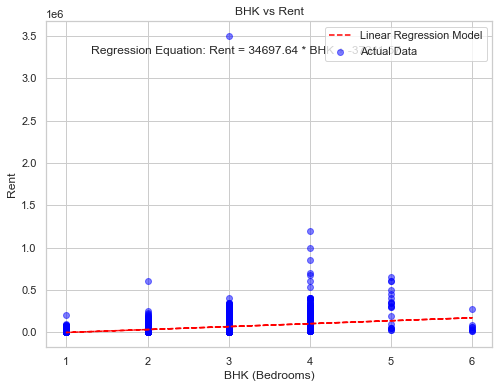

In [250]:
x = df["BHK"]
y = df["Rent"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

plt.scatter(x, y, label='Actual Data', color='blue', alpha=0.5)
plt.plot(x, mymodel, color='red', linestyle='--', label='Linear Regression Model')
plt.title('BHK vs Rent')
plt.xlabel('BHK (Bedrooms)')
plt.ylabel('Rent')
plt.legend()

eq_text = f'Regression Equation: Rent = {slope:.2f} * BHK + {intercept:.2f}'
plt.text(0.1, 0.9, eq_text, transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [251]:
summation = 0
n=len(y)
for i in range (0,n):
  difference = y[i] - mymodel[i]
  squared_difference = difference**2 
  summation = summation + squared_difference
MSE = summation/n
print("The Mean Square Error is: " , MSE)

The Mean Square Error is:  5265602789.328208


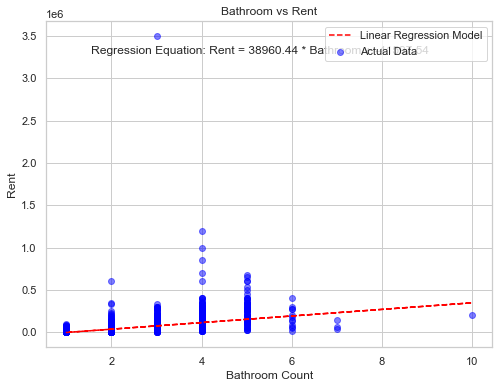

In [252]:
x = df["Bathroom"]
y = df["Rent"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myLinReg(x):
  return slope * x + intercept

y_predict = list(map(myLinReg, x))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

plt.scatter(x, y, label='Actual Data', color='blue', alpha=0.5)
plt.plot(x, y_predict, color='red', linestyle='--', label='Linear Regression Model')
plt.title('Bathroom vs Rent')
plt.xlabel('Bathroom Count')
plt.ylabel('Rent')
plt.legend()

eq_text = f'Regression Equation: Rent = {slope:.2f} * Bathroom + {intercept:.2f}'
plt.text(0.1, 0.9, eq_text, transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [253]:
summation = 0
n=len(y)
for i in range (0,n):
  difference = y[i] - y_predict[i]
  squared_difference = difference**2 
  summation = summation + squared_difference
MSE = summation/n
print("The Mean Square Error is: " , MSE)

The Mean Square Error is:  4911965108.6101265


In [254]:
def estimate_coef(x, y):
  n = np.size(x)

  m_x = np.mean(x)
  m_y = np.mean(y)

  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return (b_0, b_1)


x = np.array(df["Size"])
y = np.array(df["Rent"])

b = estimate_coef(x, y)

print("Estimated coefficients:\nb_0 or intercecpt = {} \nb_1 or slope = {}".format(b[0], b[1]))


Estimated coefficients:
b_0 or intercecpt = -14282.440720140461 
b_1 or slope = 50.931642618140955


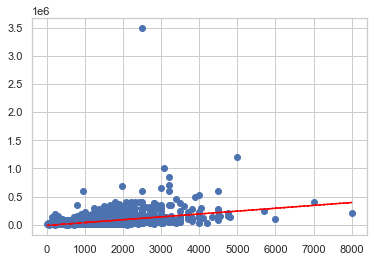

In [255]:
plt.scatter(x, y)
y_pred = b[0] + b[1]*x

plt.plot(x, y_pred, color = "red", linestyle='--')
plt.show()

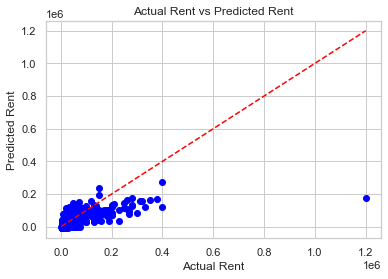

Slopes (Coefficients): [ 2.10539407e+01 -2.69131569e+02  2.76245630e+04]
Intercept: -39022.928496855246


In [256]:
X = df[['Size', 'BHK', 'Bathroom']]
y = df['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_
intercept = model.intercept_

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Actual Rent vs Predicted Rent')
plt.show()

print("Slopes (Coefficients):", slope)
print("Intercept:", intercept)

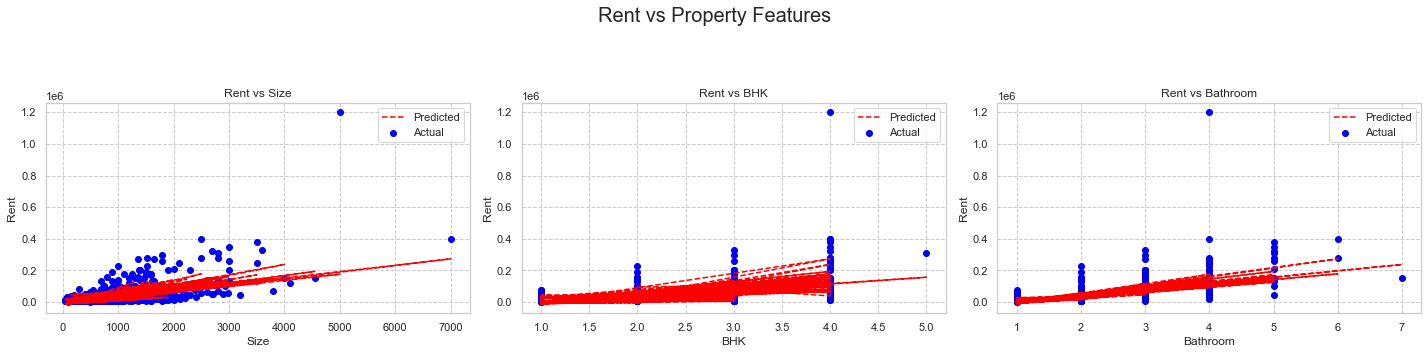

Slopes (Coefficients): [ 2.10539407e+01 -2.69131569e+02  2.76245630e+04]
Intercept: -39022.928496855246


In [260]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(20, 5))

for i, var in enumerate(['Size', 'BHK', 'Bathroom']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_test[var], y_test, color='blue', label='Actual')
    plt.plot(X_test[var], y_pred, color='red', linestyle='--', label='Predicted')
    plt.xlabel(var)
    plt.ylabel('Rent')
    plt.title(f'Rent vs {var}')
    plt.legend()
    plt.grid(True, linestyle='--')

plt.suptitle("Rent vs Property Features\n\n", fontsize=20)
plt.tight_layout()
plt.show()

slope = model.coef_
intercept = model.intercept_
print("Slopes (Coefficients):", slope)
print("Intercept:", intercept)